# Importing Packages

In [4]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, logm
from scipy.special import comb
from itertools import combinations_with_replacement, product
from collections import Counter
import copy
from scipy.linalg import ishermitian
import time

# Definitions

In [6]:
params = {
    'N': 10, # no. of sites
    't':1, # Hopping Amplitude
    'T': 10, # Total Time Evolution
    'tau': 0.1 # Time step
}

params['N'], params['k'] = 7, 7
params['N1'], params['N2'], params['N3'] = 3, 4, 7
params['U1'], params['U2'], params['U3'] = 0.5, 10, 0.5
params['mu'] = 0

params['start_site'], params['end_site'] = 0, 2

params['dim'], params['truncationParam_n'] = 0, 2
params['occupationTuple_lst'] = []
params['Map_ParticleLoc_OccupNo']={}
params['map_occupToD_Dim'] = {}

def dimension(params, **kwargs):
    '''
    For k identical bosonic particles on N lattice site, 
    Changes the dim and initializes the vac state
    based on dim.
    Makes change to the params - 'dim', 'vac' within the function.
    Make sure to define the parameters list as params.
    Return: Null
    '''
    N, k, dim = params['N'], params['k'], int(params['dim']) # N = number of sites, k = no. of identical bosonic particles
    params['dim'] = int(comb(N+k-1, k)) # This is for k identical bosonic particles
    params['vac'] = sp.csc_matrix(np.zeros(N))
    pass

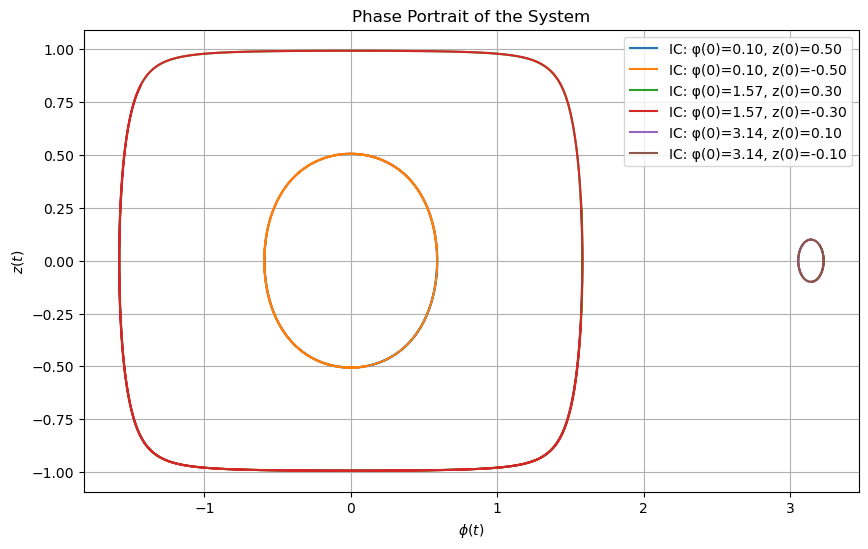

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
J = 1.0  # Coupling constant
N, U = 2, 0.5
nu = N*U # Additional constant (nu)
hbar = 1.0  # Planck's constant (normalized)

# Define the system of equations
def system(t, y):
    phi, z = y
    # Ensure z remains between -1 and 1 to avoid invalid values in sqrt
    if np.abs(z) >= 1:
        z = np.sign(z) * 0.999  # Safeguard to avoid z=1 or z=-1
    phi_dot = (J * z * np.cos(phi)) / np.sqrt(1 - z**2) + (nu * z) / 4
    z_dot = -J * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]

# Time span for integration
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Initial conditions (phi(0), z(0))
initial_conditions = [
    [0.1, 0.5],
    [0.1, -0.5],
    [np.pi/2, 0.3],
    [np.pi/2, -0.3],
    [np.pi, 0.1],
    [np.pi, -0.1],
]

# Plot phase portraits
plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    # Solve the system of equations
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')
    
    # Extract solutions
    phi_vals = sol.y[0]
    z_vals = sol.y[1]
    
    # Plot phase portrait
    plt.plot(phi_vals, z_vals, label=f'IC: φ(0)={phi0:.2f}, z(0)={z0:.2f}')
    
# Customize plot
plt.xlabel(r'$\phi(t)$')  # Using raw string for LaTeX
plt.ylabel(r'$z(t)$')  # Using raw string for LaTeX
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid(True)
plt.show()
